# モデルの訓練

## 線形回帰

線形回帰モデルの予測
\begin{equation}
\hat{y} =\theta_0 + \theta_1 x_1 + ・・・ + \theta_n x_n
\end{equation}

- $\hat{y} $ : 予測された値
- n : 特徴量数
- $x_i$ : i番目の特徴量
- $\theta_j$ j番目のモデルのパラメータ(バイアス項$\theta_0$特徴量の重み$\theta_1, \theta_2, ・・・, \theta_n$を含む)

ベクトル式で表す
\begin{equation}
\hat{y} =h_\theta(x) = \theta^T ・x
\end{equation}

- $\theta$: モデルのパラメータベクトル(バイアスの項$\theta_0, \theta_1$から$\theta_n$項までの特徴量の重みを含む)
- $\theta^T$: $\theta$の転置
- $x$: インスタンスの特徴量ベクトル($x_0$から$x_n$までを含む　ただし$x_0$は1)
- $\theta^T ・x$:  $\theta^T$と$x$のドット積
- $h_\theta$: モデルパラメータ$\theta$を使った仮説関数

線形回帰のもっとも一般的な性能指標は`二乗平均平方根誤差(Root Mean Square Error: MSE)`である

\begin{equation}
MSE(X, h(\theta)) = \frac{1}{m}\sum_{i=1}^{m}(\theta^T ・x - y^{(i)})^2
\end{equation}

## 正規方程式

コスト関数を最小にする$\theta$を見つけるための閉形式解がある  
これを正規方程式と呼ぶ

\begin{equation}
\hat{\theta} = (X^T・X)^{-1}・X^T・y
\end{equation}

- $\hat{\theta}$: コスト関数を最小にする$\theta$
- y: $y^{(1)}$から$y^{(m)}$までのターゲット値を格納するベクトル

この方程式をテストする

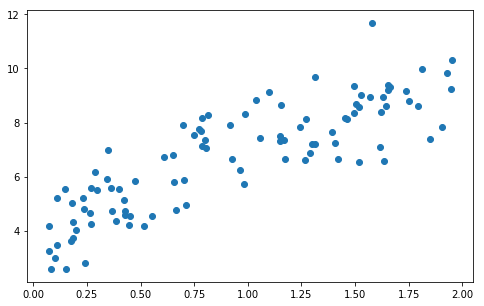

In [10]:
import numpy as np
import matplotlib.pyplot as plt

'''
y = 3x+4 + ノイズ
'''
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(8, 5))
plt.scatter(X, y)
plt.show()

正規方程式を使用して$\hat{\theta}$を計算する  
`np.linalgのinv()`関数を使用して逆行列を計算し、dot()メソッドを使用して乗算を行う

In [11]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[4.0300022 ],
       [2.91542674]])

$y=3x_1+4+ノイズ$なので割と近い

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.0300022 ],
       [9.86085568]])

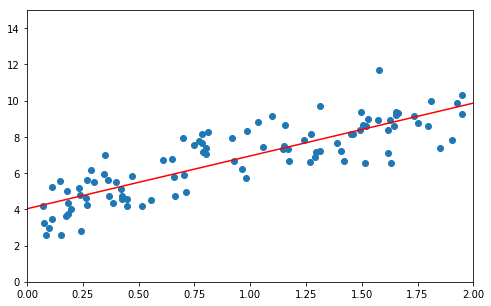

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(X_new, y_predict, "r-")
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])
plt.show()

scikit-learnを使用するとこうなる

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lin_reg.intercept_, lin_reg.coef_

(array([4.0300022]), array([[2.91542674]]))

In [17]:
lin_reg.predict(X_new)

array([[4.0300022 ],
       [9.86085568]])

## 勾配下降法

### バッチ勾配下降法

\begin{equation}
\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^{T}\cdot x^{(i)} - y^{(i)})x_j^{(i)}
\end{equation}